<a href="https://colab.research.google.com/github/castudil/Machine-Learning/blob/main/S09-Support-Vector-Machines/S09_LAB_SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Laboratorio de Máquinas de Soporte Vectorial en Python

## Objetivo
El objetivo de este laboratorio es experimentar con un conjunto de datos artificial que sigue una distribución Gaussiana creada por el programador. Utilizaremos el kernel Gaussiano para aprender la estructura utilizando máquinas de Soporte Vectorial.


## Etapas Metodológicas

Se deben seguir las siguientes cinco etapas metodológicas:

1. **Obtención de datos**: Generar un conjunto de datos artificial siguiendo una distribución Gaussiana.

2. **Manipulación**: Dividir el conjunto de datos en conjuntos de entrenamiento, prueba y validación.

3. **Exploración**: Visualizar los datos para entender la distribución y la relación entre las categorías.

4. **Modelamiento**: Implementar un clasificador de Máquinas de Soporte Vectorial utilizando el kernel Gaussiano.

5. **Interpretación**: Analizar y discutir los resultados obtenidos, incluyendo las estadísticas de clasificación y los parámetros ajustados.

## Instrucciones

1. Crea un Jupyter notebook para llevar a cabo el laboratorio.

2. Genera un conjunto de datos artificial que siga una distribución Gaussiana concéntrica.

3. Divide el conjunto de datos en conjuntos de entrenamiento, prueba y validación.

4. Grafica los conjuntos de datos, asignando el color rojo a una categoría y el color azul a la otra.

5. Entrena un clasificador de Máquinas de Soporte Vectorial utilizando el kernel Gaussiano.

6. Muestra las estadísticas de clasificación (precisión, recall, F1-score, etc.).

7. Realiza ajustes en los parámetros del clasificador y documenta los cambios en el rendimiento.

8. Interpreta los resultados y concluye sobre la eficacia del modelo.

9. Entrega el Jupyter notebook con todos los pasos y explicaciones detalladas.

Recuerda documentar cada paso y proporcionar explicaciones claras y concisas en tu notebook. ¡Buena suerte!



#PASO 1 Obtención de datos

In [1]:
# Generar un conjunto de datos artificial que siga una distribución gaussiana concéntrica
from sklearn.datasets import make_gaussian_quantiles
import matplotlib.pyplot as plt

X1, Y1 = make_gaussian_quantiles(cov=2.,
                                    n_samples=1000, n_features=2,
                                    n_classes=2, random_state=1)

# PASO 2: Manipulación de datos


In [2]:
# Dividir el conjunto de datos en conjuntos de entrenamiento, prueba y validación
from sklearn.model_selection import train_test_split
X_train, X_temp, y_train, y_temp = train_test_split(X1, Y1, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Normalizar los datos
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

#PASO 3: Exploración de Datos

         X1        X2  Clase
0 -1.140108  0.069384      0
1  1.533599 -0.155701      0
2 -1.559834  1.074086      1
3  1.239134  0.174310      0
4 -2.794104 -0.832874      1
5  1.600366  2.149346      1
6 -1.794438  2.487261      1
7 -2.014312  1.830250      1
8 -0.031621 -1.980564      1
9 -1.691204  3.543991      1
                X1           X2       Clase
count  1000.000000  1000.000000  1000.00000
mean      0.055864     0.037669     0.50000
std       1.426749     1.419541     0.50025
min      -4.318675    -4.459521     0.00000
25%      -0.884761    -0.875978     0.00000
50%       0.073956     0.011956     0.50000
75%       0.988335     1.025992     1.00000
max       4.696715     5.598310     1.00000
          X1        X2
X1  1.000000 -0.037629
X2 -0.037629  1.000000
Clase
0    500
1    500
Name: count, dtype: int64
Clase
0    0.5
1    0.5
Name: proportion, dtype: float64


<Figure size 1500x1000 with 0 Axes>

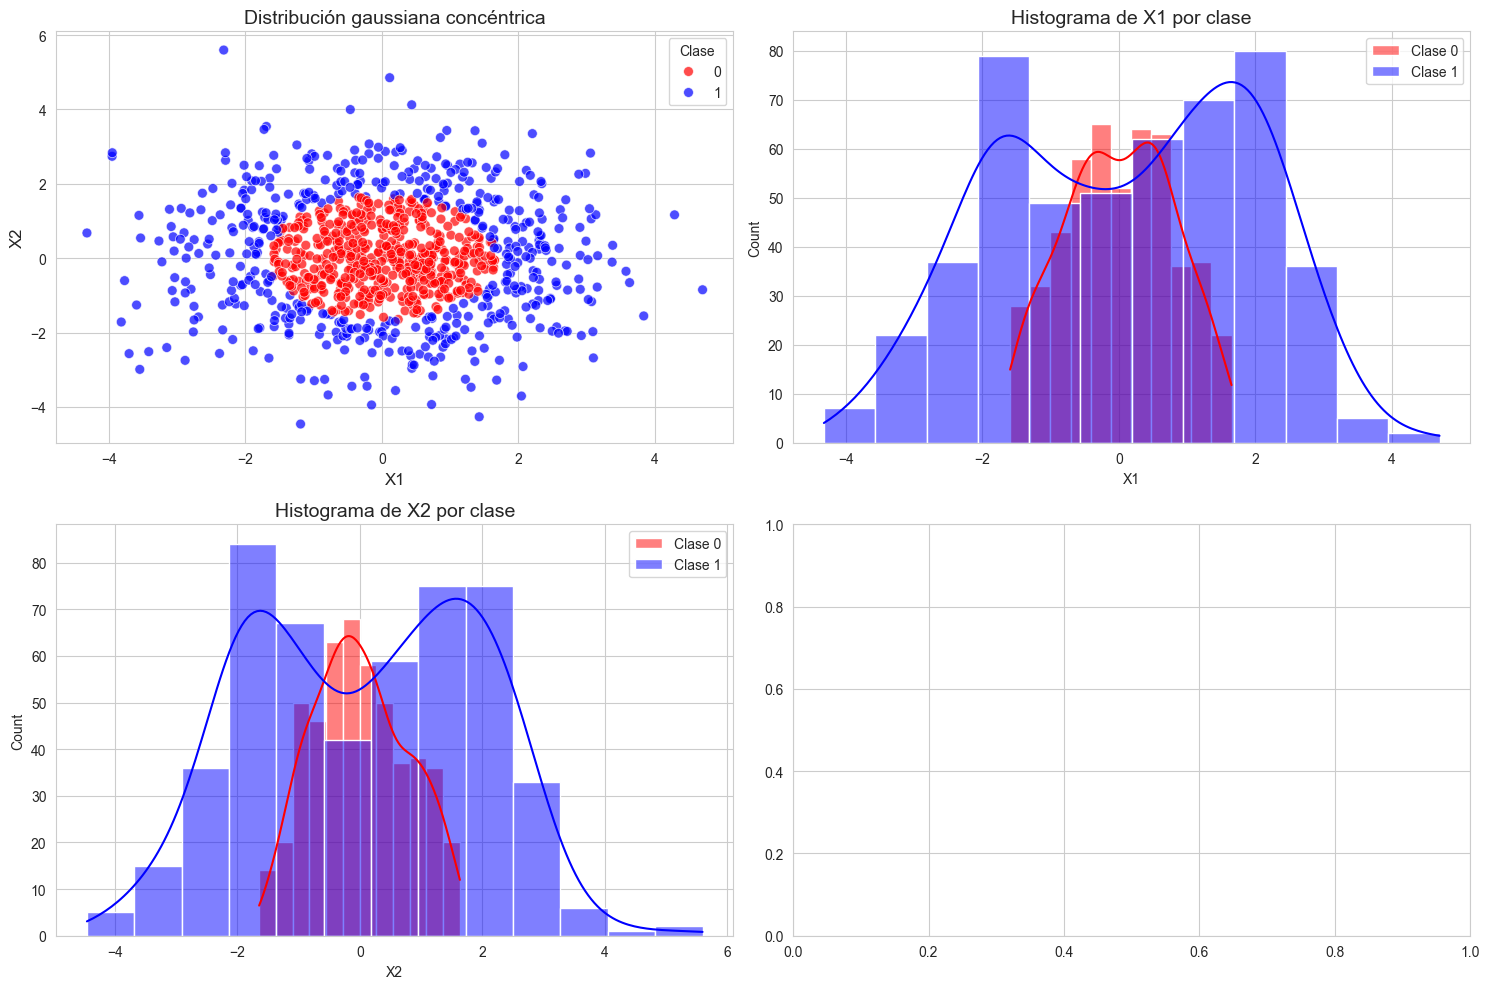

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.colors as mcolors

df = pd.DataFrame(X1, columns=['X1', 'X2']) # Data
df['Clase'] = Y1
print(df.head(10)) # Visualizar las primeras 10 filas
print(df.describe()) # Resumen estadístico de los datos
print(df[['X1', 'X2']].corr()) # Matriz de correlación
print(df['Clase'].value_counts()) # Conteo de clases
print(df['Clase'].value_counts(normalize=True)) # Proporción de clases

# Configuración para gráficos
plt.figure(figsize=(15, 10))
sns.set_style("whitegrid")

# Crear subplots
fig, axs = plt.subplots(2, 2, figsize=(15, 10))

# Graficar los datos, asignando el color roja a una categoria y azul a la otra
ax = axs[0, 0]
sns.scatterplot(x='X1', y='X2', hue='Clase', data=df, palette=['red', 'blue'], 
                s=50, alpha=0.7, ax=ax)
ax.set_title('Distribución gaussiana concéntrica', fontsize=14)
ax.set_xlabel('X1', fontsize=12)
ax.set_ylabel('X2', fontsize=12)

# Histogramas de X1 por clase
ax = axs[0, 1]
for clase in [0, 1]:
    sns.histplot(df[df['Clase'] == clase]['X1'], kde=True, 
                color='red' if clase == 0 else 'blue', 
                alpha=0.5, ax=ax, label=f'Clase {clase}')
ax.set_title('Histograma de X1 por clase', fontsize=14)
ax.legend()

# Histogramas de X2 por clase
ax = axs[1, 0]
for clase in [0, 1]:
    sns.histplot(df[df['Clase'] == clase]['X2'], kde=True, 
                color='red' if clase == 0 else 'blue', 
                alpha=0.5, ax=ax, label=f'Clase {clase}')
ax.set_title('Histograma de X2 por clase', fontsize=14)
ax.legend()

plt.tight_layout()
plt.show()

# PASO 4: Modelamiento de Datos (Machine Learning)


Reporte de clasificación del modelo inicial:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99        96
           1       1.00      0.99      1.00       104

    accuracy                           0.99       200
   macro avg       0.99      1.00      0.99       200
weighted avg       1.00      0.99      1.00       200

Fitting 5 folds for each of 16 candidates, totalling 80 fits

Mejores hiperparámetros encontrados:
{'C': 100, 'gamma': 1, 'kernel': 'rbf'}

Reporte de clasificación del mejor modelo en validación:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        96
           1       1.00      1.00      1.00       104

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



Evaluación final en el conjunto de prueba:

Reporte de clasificación final:
              precision  

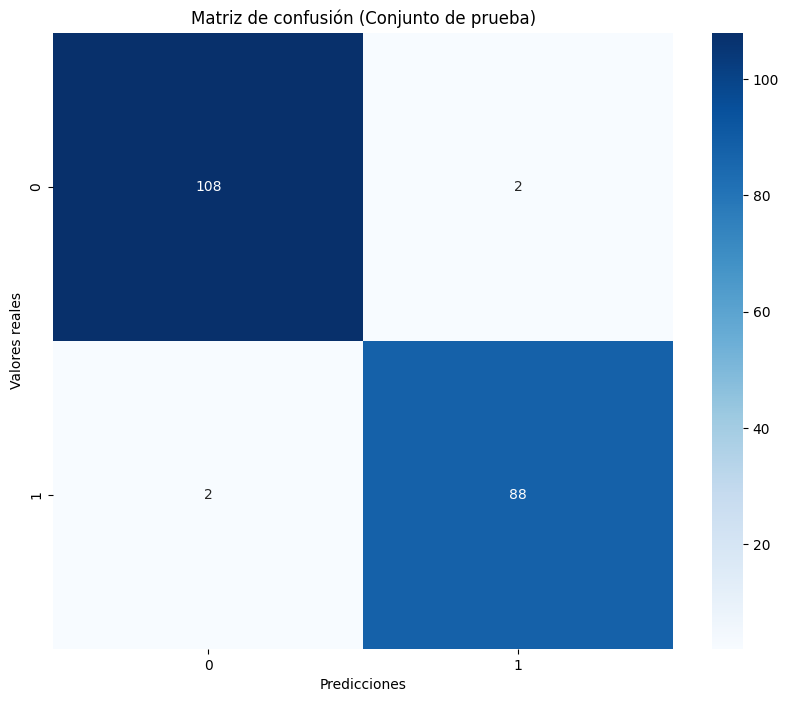

In [ ]:
# Entrenar un clasificador SVM con un kernel gaussiano
# Utilizar grid-search para encontrar los mejores hiperparámetros
from sklearn import svm
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

# Entrenamiento del modelo inicial
clf = svm.SVC(kernel='rbf', gamma=0.7, C=1.0)
clf.fit(X_train, y_train)

# Evaluación del modelo inicial en el conjunto de validación
y_val_pred = clf.predict(X_val)
print("\nReporte de clasificación del modelo inicial:")
print(classification_report(y_val, y_val_pred))

# Configuración de Grid Search para encontrar los mejores hiperparámetros, usando el conjunto de validación
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [0.001, 0.01, 0.1, 1],
    'kernel': ['rbf']
}

# Crear el modelo para Grid Search
grid_search = GridSearchCV(
    estimator=svm.SVC(),
    param_grid=param_grid,
    cv=5,  # Validación cruzada
    scoring='f1_weighted',  # Optimizar para f1-score
    n_jobs=-1,  # Usar todos los procesadores disponibles
    verbose=2
)

# Entrenar el modelo con grid search
grid_search.fit(X_train, y_train)

# Imprimir los mejores parámetros
print("\nMejores hiperparámetros encontrados:")
print(grid_search.best_params_)

# Evaluar el modelo con los mejores parámetros en el conjunto de validación
best_clf = grid_search.best_estimator_
y_val_pred_best = best_clf.predict(X_val)
print("\nReporte de clasificación del mejor modelo en validación:")
print(classification_report(y_val, y_val_pred_best))

# Solo después de seleccionar el mejor modelo, evaluamos en el conjunto de prueba
print("\n\nEvaluación final en el conjunto de prueba:")
y_test_pred = best_clf.predict(X_test)
print("\nReporte de clasificación final:")
print(classification_report(y_test, y_test_pred))

# Visualizar la matriz de confusión final
cm = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicciones')
plt.ylabel('Valores reales')
plt.title('Matriz de confusión (Conjunto de prueba)')
plt.show()

#PASO 5: Interpretación de los Resultados

In [ ]:
# El modelo SVM con kernel RBF mostró un buen desempeño en la clasificación,
# con métricas altas tanto en la fase de validación como de prueba. Después de ajustar los
# hiperparámetros con la técnica de GridSearch, el rendimiento mejoró aún más, con pocos errores
# según la matriz de confusión.
#
# Es probable que este buen resultado se deba a que los datos eran
# artificiales y bien estructurados. En un escenario real, con datos más ruidosos
# o solapados, el modelo podría no rendir igual de bien.